<a href="https://colab.research.google.com/github/jandyr/ProSeisSN/blob/main/fk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install obspy
import obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt
from obspy import read
from obspy.signal.tf_misfit import cwt
import numpy as np
import matplotlib.pyplot as plt


st = read('https://examples.obspy.org/COP.BHZ.DK.2009.050')
print(st)
tr = st[0]
del st

npts = tr.stats.npts
dt = tr.stats.delta
t = np.linspace(0, dt * npts, npts)
f_min = 1
f_max = 50

scalogram = cwt(tr.data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)

1 Trace(s) in Stream:
DK.COP..BHZ | 2009-02-19T00:00:00.025100Z - 2009-02-19T23:59:59.975100Z | 20.0 Hz, 1728000 samples


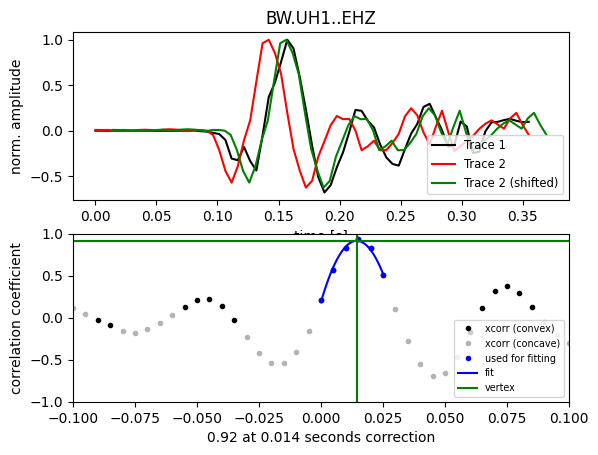

No preprocessing:
  Time correction for pick 2: -0.014459
  Correlation coefficient: 0.92


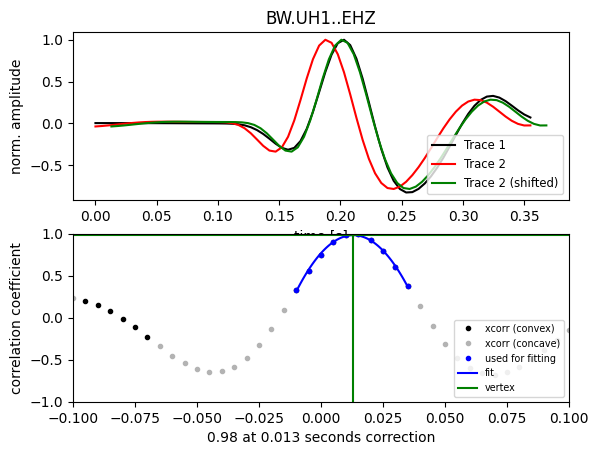

Bandpass prefiltering:
  Time correction for pick 2: -0.013025
  Correlation coefficient: 0.98


In [ ]:
from __future__ import print_function

import obspy
from obspy.signal.cross_correlation import xcorr_pick_correction


# read example data of two small earthquakes
path = "https://examples.obspy.org/BW.UH1..EHZ.D.2010.147.%s.slist.gz"
st1 = obspy.read(path % ("a", ))
st2 = obspy.read(path % ("b", ))
# select the single traces to use in correlation.
# to avoid artifacts from preprocessing there should be some data left and
# right of the short time window actually used in the correlation.
tr1 = st1.select(component="Z")[0]
tr2 = st2.select(component="Z")[0]
# these are the original pick times set during routine analysis
t1 = obspy.UTCDateTime("2010-05-27T16:24:33.315000Z")
t2 = obspy.UTCDateTime("2010-05-27T16:27:30.585000Z")

# estimate the time correction for pick 2 without any preprocessing and open
# a plot window to visually validate the results
dt, coeff = xcorr_pick_correction(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True)
print("No preprocessing:")
print("  Time correction for pick 2: %.6f" % dt)
print("  Correlation coefficient: %.2f" % coeff)
# estimate the time correction with bandpass prefiltering
dt, coeff = xcorr_pick_correction(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True,
                                  filter="bandpass",
                                  filter_options={'freqmin': 1, 'freqmax': 10})
print("Bandpass prefiltering:")
print("  Time correction for pick 2: %.6f" % dt)
print("  Correlation coefficient: %.2f" % coeff)
